In [2]:
import pandas as pd
from PIL import Image
from io import BytesIO
import requests
import os
import json

In [3]:
df = pd.read_csv("/content/train_data_set_VLM.csv")
df.head()

,objectID,primaryImageLink,objectName,title,artistDisplayName,objectDate,medium,dimensions,city,classification,description,Question1,Answer1,Question2,Answer2,Question3,Answer3,Question4,Answer4
0,1986,https://images.metmuseum.org/CRDImages/ad/orig...,Chess set,Chess set,NaN,ca. 1800,"Lacquered wood, ivory",Board: 1 3/4 x 16 5/8 x 16 5/8 in. (4.4 x 42.2...,NaN,NaN,The game of chess probably originated in India...,What is the material used to create the chess...,Lacquered wood and ivory,When was the chess set likely produced?,Circa 1800,Where did the game of chess most likely origi...,India,What distinguishes this chess set from other ...,Its exquisitely intricate carving
1,9748,https://images.metmuseum.org/CRDImages/ad/orig...,Watch stand,Watch stand,NaN,1800–1820,Ivory,10 3/16 x 7 1/2 x 3 7/8 in. (25.9 x 19.1 x 9.8...,NaN,NaN,"This ivory stand, made in India or China for e...",What is the name of the art?,Watch stand,When was the art created?,1800–1820,What is the material used to create the stand?,Ivory,What is the purpose of the stand?,To display a pocket watch upright
2,38638,https://images.metmuseum.org/CRDImages/is/orig...,Huqqa base,Huqqa Base with Wheel-Cut Decoration,NaN,early 19th century,Green glass; cut and inlaid with gold,H. 7 1/2 in. (19.1 cm)\r\nDiam. 6 1/4 in. (15....,NaN,Glass,"The materials, style and shape of this huqqa b...",What is the name of the object?,Huqqa Base,What materials were used to create the object?,"Green glass, cut and inlaid with gold",What is the approximate age of the object?,Early 19th century,How does the object bridge two important part...,It combines decorative floral forms from Indi...
3,443097,https://images.metmuseum.org/CRDImages/is/orig...,Armlet,"Armlet, One of a Pair",NaN,19th century,Silver; cast and chased,H. 4 1/4 in. (10.8 cm)\r\nW. 2 3/4 in. (7 cm),Chennai (Madras),Jewelry,This type of armband (vanki) is in a style tha...,What is the object's name and type?,"Armlet, One of a Pair",When was the armlet made?,19th century,What materials were used to create the armlet?,Silver; cast and chased,Where was the armlet produced?,"Chennai (Madras), southern India"
4,444557,https://images.metmuseum.org/CRDImages/is/orig...,Water container,Water Container (Ganga-Jumna Lota),NaN,19th century,Brass and copper,H. 5 1/2 in. (14 cm)\r\nDiam. 5 in. (12.7 cm)\...,Thanjavur,Metal,"This lota, or water container, is probably bas...",What is the name of the art object?,Water Container (Ganga-Jumna Lota),When was the object created?,19th century,What materials were used to make the object?,Brass and copper,Where was the object most likely made?,Thanjavur


In [4]:
df.columns

Index(['objectID', 'primaryImageLink', 'objectName', 'title',
       'artistDisplayName', 'objectDate', 'medium', 'dimensions', 'city',
       'classification', 'description', 'Question1', 'Answer1', 'Question2',
       'Answer2', 'Question3', 'Answer3', 'Question4', 'Answer4'],
      dtype='object')

In [5]:
df1 = df[['objectID', 'primaryImageLink', 'Question1', 'Answer1', 'Question2', 'Answer2', 'Question3', 'Answer3', 'Question4', 'Answer4']]
df1.head()

,objectID,primaryImageLink,Question1,Answer1,Question2,Answer2,Question3,Answer3,Question4,Answer4
0,1986,https://images.metmuseum.org/CRDImages/ad/orig...,What is the material used to create the chess...,Lacquered wood and ivory,When was the chess set likely produced?,Circa 1800,Where did the game of chess most likely origi...,India,What distinguishes this chess set from other ...,Its exquisitely intricate carving
1,9748,https://images.metmuseum.org/CRDImages/ad/orig...,What is the name of the art?,Watch stand,When was the art created?,1800–1820,What is the material used to create the stand?,Ivory,What is the purpose of the stand?,To display a pocket watch upright
2,38638,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the object?,Huqqa Base,What materials were used to create the object?,"Green glass, cut and inlaid with gold",What is the approximate age of the object?,Early 19th century,How does the object bridge two important part...,It combines decorative floral forms from Indi...
3,443097,https://images.metmuseum.org/CRDImages/is/orig...,What is the object's name and type?,"Armlet, One of a Pair",When was the armlet made?,19th century,What materials were used to create the armlet?,Silver; cast and chased,Where was the armlet produced?,"Chennai (Madras), southern India"
4,444557,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the art object?,Water Container (Ganga-Jumna Lota),When was the object created?,19th century,What materials were used to make the object?,Brass and copper,Where was the object most likely made?,Thanjavur


In [22]:
df2 = df1.sample(frac=1)
df3 = df2.head(150)
df3

,objectID,primaryImageLink,Question1,Answer1,Question2,Answer2,Question3,Answer3,Question4,Answer4
108,447086,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the artwork?,Finial in the Form of a Parrot,In what century was the artwork created?,17th–18th century,What does the simplicity of style and informa...,It suggests that the piece likely belonged to...,In what medium was the artwork created?,Brass
465,456964,https://images.metmuseum.org/CRDImages/is/orig...,What is the title of the art?,Qur'an Manuscript,When was the art created?,Late 18th–early 19th century,What is the medium used to create the art?,"Ink, gold, and lapis on paper; leather binding",What is the style of illumination used in the...,Blue and gold palette characteristic of Kashm...
25,445246,https://images.metmuseum.org/CRDImages/is/orig...,What is the object's name?,Panel,When was the art created?,Early 17th century,What material is the art made of?,"Cotton, tasar silk, plain weave, embroidered.",What is the art typically used for?,The art was likely used as a decoration for a...
217,451283,https://images.metmuseum.org/CRDImages/is/orig...,Who is depicted in the art?,The future emperor Shah Jahan and his son Dar...,When was the art created?,Verso: ca. 1620; recto: ca. 1530–50.,What medium was used to create the art?,"Ink, opaque watercolor, and gold on paper.",What is the classification of the art?,Codices.
70,446750,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the art?,Necklace,What is the necklace made of?,"Gold, emeralds, spinels, pearls",What is the approximate date of the necklace?,18th–19th century,What is the significance of the necklace?,"It is a kaliganthi, a necklace given to a bri..."
...,...,...,...,...,...,...,...,...,...,...
258,453054,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the art?,Floral Tent Panel,When was the art created?,ca. 1635,What is the main purpose of this art?,To line the interior of tents used by Indian ...,Describe the design of the panel.,"The panel features five compartments, each co..."
525,504217,https://images.metmuseum.org/CRDImages/mi/orig...,What is the name of the art?,Kaichiliambu (vessel rattles),When was the art created?,19th century,What material is the art made of?,Bronze,What is the classification of the art?,Idiophone-Shaken-rattle
366,453223,https://images.metmuseum.org/CRDImages/is/orig...,What is the medium used to create the textile...,"Wool, cotton, and silk",In what century was the textile fragment crea...,Second half of the 17th century,What is the classification of the textile fra...,Textiles-Rugs,What distinguishes the intermediate grade of ...,Second wefts of red silk and a somewhat finer...
87,446783,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the art piece?,"Earring, One of a Set of Four",When was the art piece created?,19th century,What is the medium used to create the art piece?,Gold,Who created the art piece?,Artist's name is not mentioned in the descrip...


In [23]:
df3.to_csv("sampled_data150.csv", index=False)

In [24]:
df3.columns

Index(['objectID', 'primaryImageLink', 'Question1', 'Answer1', 'Question2',
       'Answer2', 'Question3', 'Answer3', 'Question4', 'Answer4'],
      dtype='object')

In [53]:
df3[:5]

,objectID,primaryImageLink,Question1,Answer1,Question2,Answer2,Question3,Answer3,Question4,Answer4
108,447086,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the artwork?,Finial in the Form of a Parrot,In what century was the artwork created?,17th–18th century,What does the simplicity of style and informa...,It suggests that the piece likely belonged to...,In what medium was the artwork created?,Brass
465,456964,https://images.metmuseum.org/CRDImages/is/orig...,What is the title of the art?,Qur'an Manuscript,When was the art created?,Late 18th–early 19th century,What is the medium used to create the art?,"Ink, gold, and lapis on paper; leather binding",What is the style of illumination used in the...,Blue and gold palette characteristic of Kashm...
25,445246,https://images.metmuseum.org/CRDImages/is/orig...,What is the object's name?,Panel,When was the art created?,Early 17th century,What material is the art made of?,"Cotton, tasar silk, plain weave, embroidered.",What is the art typically used for?,The art was likely used as a decoration for a...
217,451283,https://images.metmuseum.org/CRDImages/is/orig...,Who is depicted in the art?,The future emperor Shah Jahan and his son Dar...,When was the art created?,Verso: ca. 1620; recto: ca. 1530–50.,What medium was used to create the art?,"Ink, opaque watercolor, and gold on paper.",What is the classification of the art?,Codices.
70,446750,https://images.metmuseum.org/CRDImages/is/orig...,What is the name of the art?,Necklace,What is the necklace made of?,"Gold, emeralds, spinels, pearls",What is the approximate date of the necklace?,18th–19th century,What is the significance of the necklace?,"It is a kaliganthi, a necklace given to a bri..."


In [59]:
import pandas as pd
from PIL import Image
from io import BytesIO
import requests
import os
import json

def process_and_save(dataset, output_folder, subset_name):
    # Define image subfolder within output folder
    subset_folder = os.path.join(output_folder, subset_name)
    image_subfolder = os.path.join(output_folder, 'images')


    if not os.path.exists(image_subfolder):
        os.makedirs(image_subfolder)


    if not os.path.exists(subset_folder):
        os.makedirs(subset_folder)


    # Initialize list to hold all JSON data
    json_data_list = []


    # Process and save images and labels
    for _, row in dataset.iterrows():

        unique_id = str(row['objectID'])

        # Load image from the URL
        response = requests.get(row['primaryImageLink'])
        image = Image.open(BytesIO(response.content))

        # Define image path
        image_path = os.path.join(image_subfolder, f"{unique_id}.jpg")

        # Save image
        image.save(image_path)

        # Structure for LLaVA JSON
        json_data = {
            "id": unique_id,
            "image": f"{unique_id}.jpg",
            "conversations": [
                {
                    "from": "human",
                    "value": row['Question1']
                },
                {
                    "from": "LLaVA",
                    "value": row['Answer1']
                },
                {
                    "from": "human",
                    "value": row['Question2']
                },
                {
                    "from": "LLaVA",
                    "value": row['Answer2']
                },
                {
                    "from": "human",
                    "value": row['Question3']
                },
                {
                    "from": "LLaVA",
                    "value": row['Answer3']
                },
                {
                    "from": "human",
                    "value": row['Question4']
                },
                {
                    "from": "LLaVA",
                    "value": row['Answer4']
                }
            ]
        }

        # Append to list
        json_data_list.append(json_data)


    # Save the JSON data list to a file
    json_output_path = os.path.join(output_folder, subset_name, 'dataset.json')
    with open(json_output_path, 'w') as json_file:
        json.dump(json_data_list, json_file, indent=4)


def save_dataset(output_folder, subset_name, val_samples=None):
    # Load the dataset from Hugging Face
    dataset = pd.read_csv("sampled_data150.csv")

    # Determine the split for training and validation
    if subset_name == 'test':
        test_dataset = dataset[100:150]
        process_and_save(test_dataset, output_folder, subset_name)

    elif subset_name == 'train':
        if val_samples is not None:
            train_dataset = dataset[val_samples:100]
            val_dataset = dataset[:val_samples]
        else:
            train_dataset = dataset
            val_dataset = []

        # Process and save the datasets
        for subset, data in [('train', train_dataset), ('validation', val_dataset)]:
            if not data.empty:
                process_and_save(data, output_folder, subset)


# Usage example
output_folder = 'dataset'
val_samples = 20
save_dataset(output_folder, 'train', val_samples)
# save_dataset(output_folder, 'test')


In [60]:
import shutil
shutil.make_archive('dataset', 'zip', 'dataset')

'/content/dataset.zip'

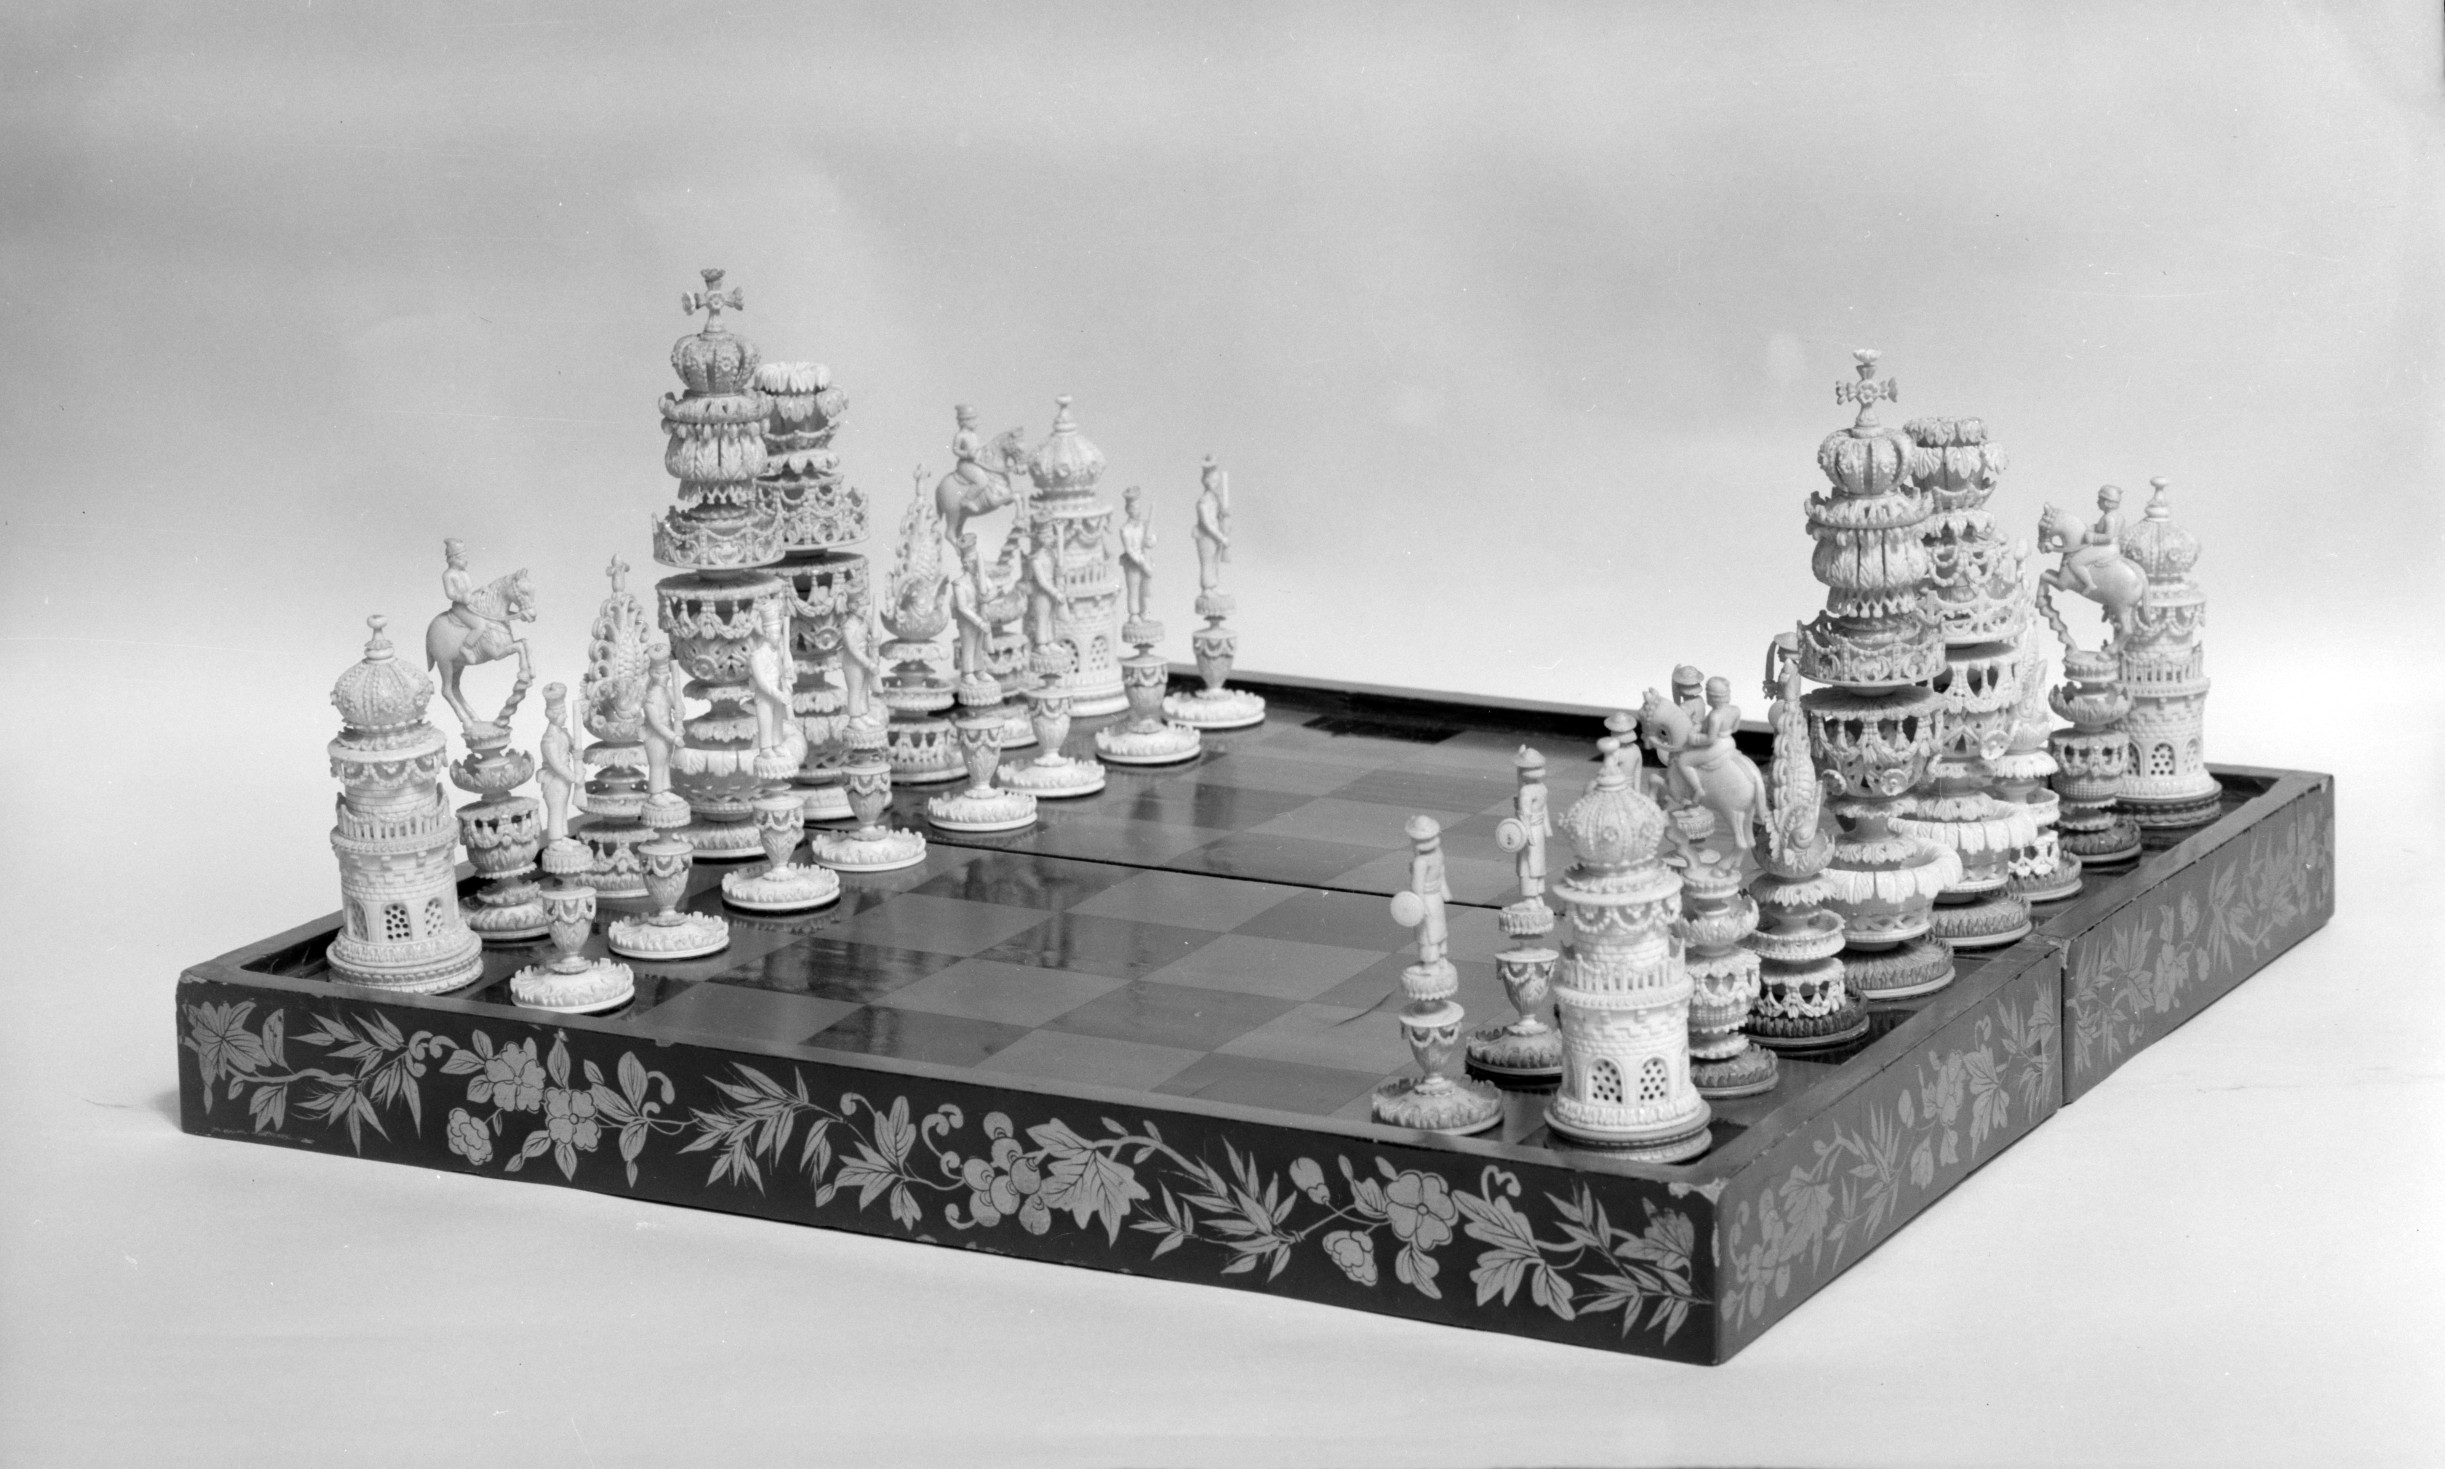

In [43]:
import requests

response = requests.get("https://images.metmuseum.org/CRDImages/ad/original/138425.jpg")
image = Image.open(BytesIO(response.content))
image

In [50]:
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2445x1469 at 0x7E2C2337CDC0>
